## EDA

In [1]:
# PYTORCH data loading
# import torch
# from models import GNN_my_model
# from torch_geometric.loader import DataLoader

# dataset = GNN_my_model.PPI(root="./data")
# dataset = dataset.shuffle()
# test_dataset = dataset[:2]
# train_dataset = dataset[2:]

# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
# for b in train_loader:
#     print(b)

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

In [3]:
with open('ppi/ppi-class_map.json') as f:
    cm = json.load(f)
    
with open('ppi/ppi-G.json') as f:
    g = json.load(f)

## Labels

In [4]:
classes = pd.DataFrame(cm).T
classes.index = classes.index.astype(int)
classes.sort_index(inplace=True)

In [5]:
classes

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,1,1,0
1,1,0,0,0,0,0,0,1,0,1,...,1,1,1,0,1,1,1,1,1,1
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,1,1,1,1,0,0
4,1,0,0,0,0,0,0,1,1,1,...,0,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56939,1,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,1,1,1,0
56940,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,1,0
56941,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,1,1,1,0
56942,1,0,0,0,0,0,0,0,0,1,...,0,1,1,1,1,1,1,1,1,1


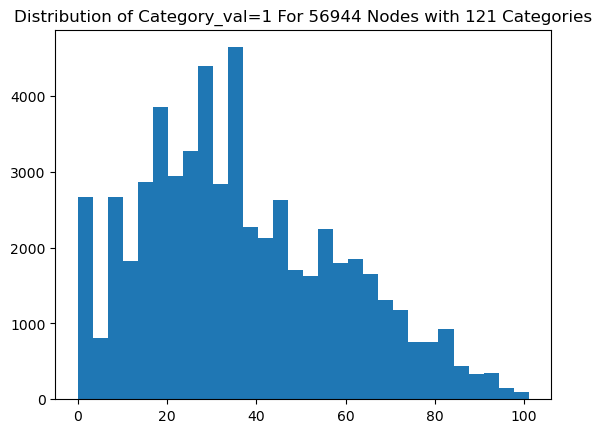

In [6]:
plt.hist(classes.sum(axis=1).tolist(), bins=30)
plt.title('Distribution of Category_val=1 For 56944 Nodes with 121 Categories');

In [7]:
print(classes.sum(axis=1).mean())
print(classes.sum(axis=1).median())

36.92696333239674
34.0


In [8]:
g_nodes = pd.DataFrame(g['nodes'])

In [9]:
# node IDs
g_nodes

,test,id,val
0,False,0,False
1,False,1,False
2,False,2,False
3,False,3,False
4,False,4,False
...,...,...,...
56939,True,56939,False
56940,True,56940,False
56941,True,56941,False
56942,True,56942,False


## Links

In [10]:
links = pd.DataFrame(g['links'])

In [11]:
links

,source,target
0,0,372
1,0,1101
2,0,766
3,1,640
4,1,1
...,...,...
818711,56927,56927
818712,56928,56928
818713,56930,56930
818714,56935,56935


<Axes: >

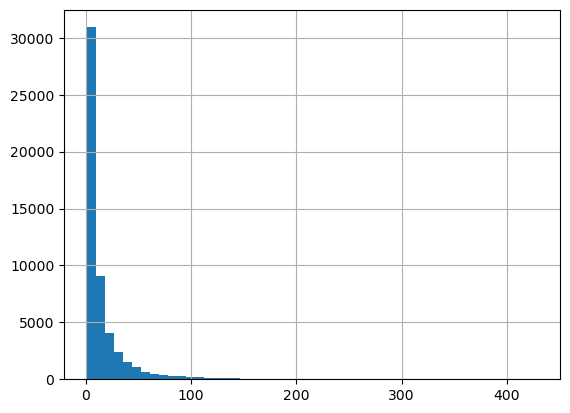

In [12]:
links.groupby('source').count()['target'].hist(bins=50)
# number of edges per node

## Node Features

In [13]:
feats_df = pd.DataFrame(np.load('ppi/ppi-feats.npy'))

In [14]:
feats_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Individual Graphs

In [15]:
# !pip install networkx

In [16]:
# creating graph in NX
lls = links[['source', 'target']].to_numpy()
gr = nx.Graph()
gr.add_edges_from(lls)
d = list(nx.connected_components(gr)) # this gets the disconnected subgraphs as a list of sets of node IDs

In [17]:
len(d)

295

In [18]:
gs = []
for i in range(295):
    if len(d[i])>2:
        gs.append(d[i])

In [19]:
len(gs)

24

In [20]:
print([len(g) for g in gs])

[1546, 1377, 2263, 2339, 1578, 1021, 1823, 2488, 591, 3312, 2401, 1878, 1819, 3480, 2794, 2326, 2650, 2815, 3163, 3021, 3195, 3284, 3194, 2300]


In [21]:
for i in gs[-2]: # testing to see if any nodes from a specific set is in the test/val set
    if i not in g_nodes[g_nodes.test==True].id:
        print('no')